In [15]:
! pip install pandas
! pip install pyarrow
! pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/673.3 kB ? eta -:--:--
   --------------------------------------- 673.3/673.3 kB 13.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 46.4 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------

In [4]:
import pandas as pd

df = pd.read_csv('data\\troop_movements.csv')

print(df.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-07-09 08:37:43        1  resistance_soldier           resistance   
1  2025-07-09 08:37:42        2              x-wing               empire   
2  2025-07-09 08:37:41        3               at-st           resistance   
3  2025-07-09 08:37:40        4             unknown               empire   
4  2025-07-09 08:37:39        5               at-st               empire   

   location_x  location_y  destination_x  destination_y    homeworld  
0           9           4              1              4     Dathomir  
1           4           2              2              8  Glee Anselm  
2           6           6              2             10       Umbara  
3           1           6             10              6         Tund  
4           5           4              2              2    Malastare  


In [5]:
# Compare resistance vs. empire counts.
empire_or_resistance_counts = df['empire_or_resistance'].value_counts()

print(empire_or_resistance_counts)

empire_or_resistance
resistance    501
empire        499
Name: count, dtype: int64


In [6]:
# Compare home world counts.
homeworld_counts = df['homeworld'].value_counts()

print(homeworld_counts)

homeworld
Serenno         34
Glee Anselm     34
Shili           32
Mon Cala        30
Socorro         28
Concord Dawn    28
Trandosha       28
Corellia        27
Ojom            27
Bestine IV      27
Tatooine        27
Vulpter         26
Champala        26
Ryloth          26
Dorin           26
Kalee           25
Tund            25
Quermia         24
Sullust         24
Chandrila       24
Zolan           23
Dathomir        23
Aleen Minor     23
Naboo           23
Haruun Kal      22
Iktotch         22
Umbara          22
Eriadu          22
Iridonia        21
Rodia           21
Skako           21
Toydaria        21
Stewjon         20
Troiken         20
Tholoth         20
Muunilinst      19
Cerea           19
Malastare       19
Kashyyyk        19
Dagobah         18
Mirial          18
Alderaan        16
Name: count, dtype: int64


In [7]:
# Compare unit type counts.
character_type_counts = df['unit_type'].value_counts()

print(character_type_counts)

unit_type
x-wing                135
stormtrooper          134
resistance_soldier    133
tie_silencer          131
unknown               129
at-at                 122
at-st                 113
tie_fighter           103
Name: count, dtype: int64


In [8]:
# Add a new feature, is_resistance, to indicate if someone is part of the resistance (True) or empire (False).
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'

print(df.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-07-09 08:37:43        1  resistance_soldier           resistance   
1  2025-07-09 08:37:42        2              x-wing               empire   
2  2025-07-09 08:37:41        3               at-st           resistance   
3  2025-07-09 08:37:40        4             unknown               empire   
4  2025-07-09 08:37:39        5               at-st               empire   

   location_x  location_y  destination_x  destination_y    homeworld  \
0           9           4              1              4     Dathomir   
1           4           2              2              8  Glee Anselm   
2           6           6              2             10       Umbara   
3           1           6             10              6         Tund   
4           5           4              2              2    Malastare   

   is_resistance  
0           True  
1          False  
2           True  
3          False  
4          Fals

<Axes: xlabel='empire_or_resistance', ylabel='count'>

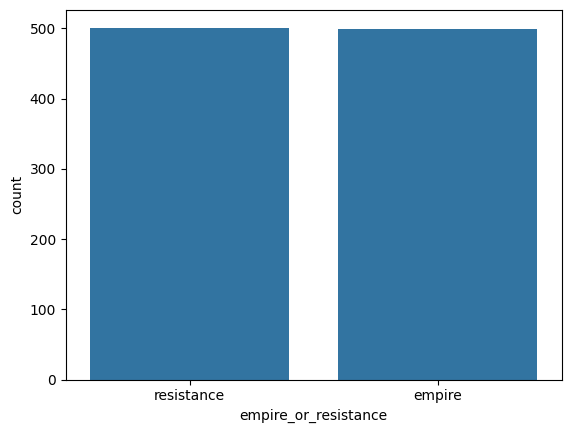

In [9]:
# Create a bar plot visualizing resistance_or_empire counts.
import seaborn as sns

sns.barplot(empire_or_resistance_counts)

In [16]:
# Create DTC model.
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DTC()

X = df[['homeworld', 'unit_type']]
y = df['empire_or_resistance']

X_encoded = pd.get_dummies(df[['homeworld', 'unit_type']])
#print(f"x_encoded: {X_encoded}")

y_encoded = pd.get_dummies(df['empire_or_resistance'])
#print(f"y_encoded: {y_encoded}")


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(accuracy_score(y_test, preds))

0.635


<Axes: xlabel='0'>

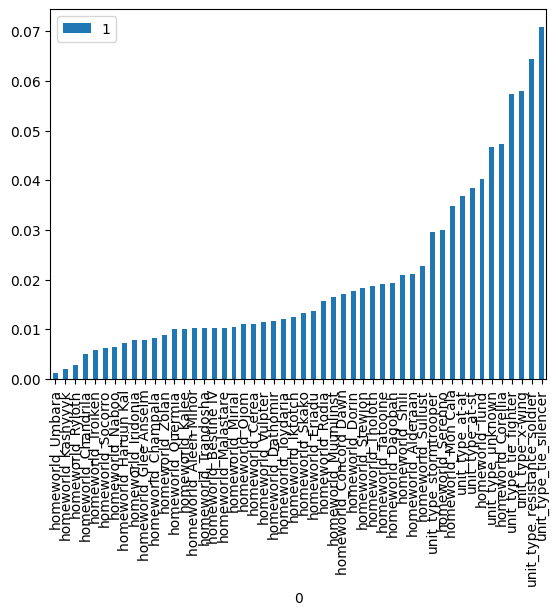

In [11]:
# Display feature importance.

importances = model.feature_importances_

df_importances = pd.DataFrame(sorted(list(zip(X_encoded.columns, importances)), key=lambda x: x[1]))

'''
_df_importances = pd.DataFrame(list(zip(X_encoded.columns, importances)))
test = _df_importances.sort_values(by=1)
'''

df_importances.plot.bar(x=0)

In [13]:
# Pickle the model.
import pickle

with open('data\\model.pkl', 'wb') as f:
    pickle.dump(model, f)